<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df = pd.read_csv("../../sampledata/week8/bank.csv")    # load the dataset

In [3]:
from copy import deepcopy

ds = deepcopy(df)

## Data Overview

In [4]:
from IPython.display import display

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
display(ds.head())

# Display basic information about the dataframe
print("\nDataset Info:")
display(ds.info())

# Display summary statistics of the dataframe
print("\nSummary Statistics:")
display(ds.describe().round(2))

First 5 rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None


Summary Statistics:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [5]:
ds.shape

(10000, 14)

In [6]:
# Check for duplicate rows
duplicate_rows = ds.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check for missing (empty) values
missing_values = ds.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Number of duplicate rows: 0

Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# Drop the 'RowNumber' column
ds.drop(columns=['RowNumber'], inplace=True)


# Drop the 'Surname' column
ds.drop(columns=['Surname'], inplace=True)

# Display the first few rows of the updated dataset
print("Updated dataset:")
display(ds.head())

Updated dataset:


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

### Univariate Analysis

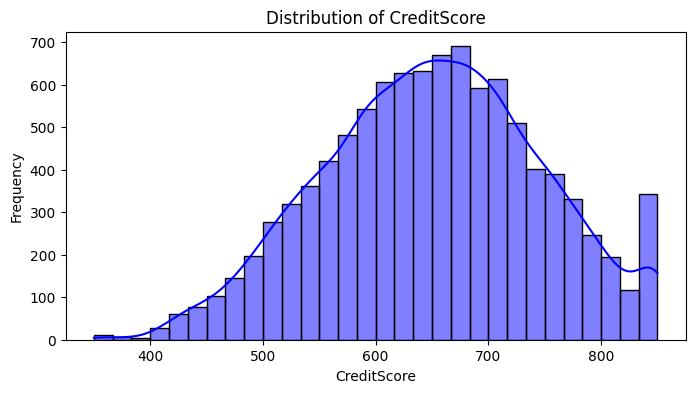

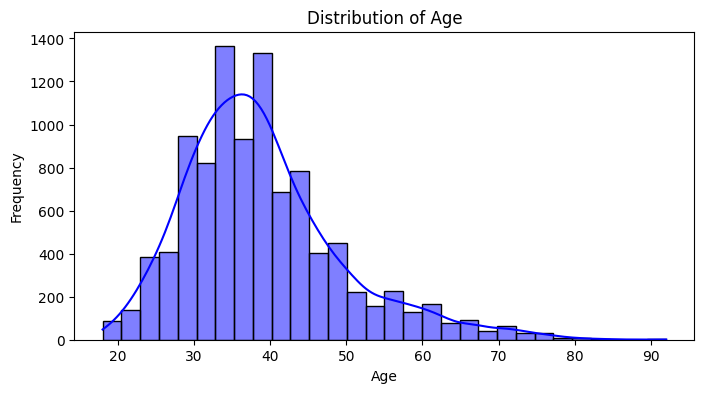

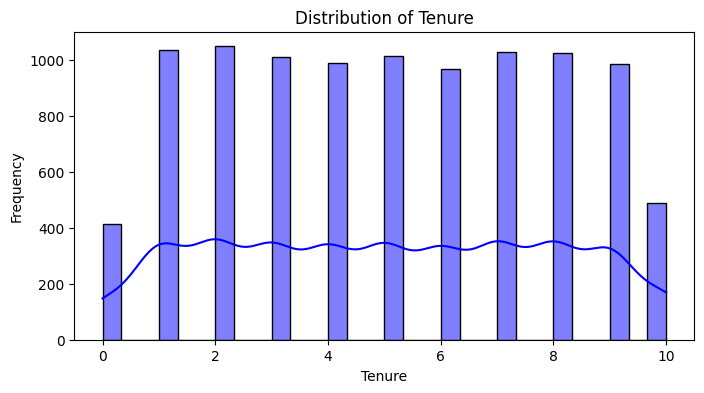

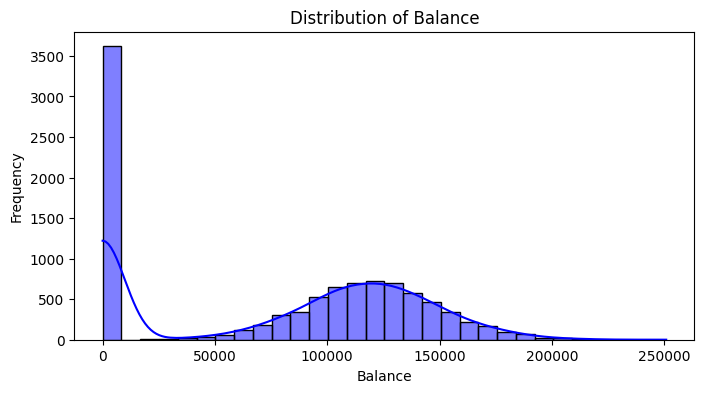

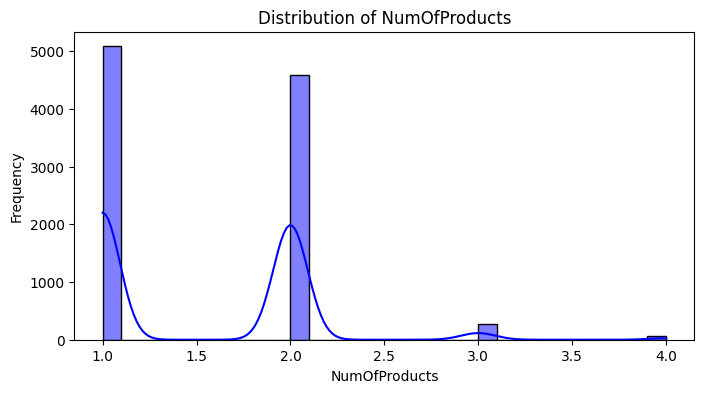

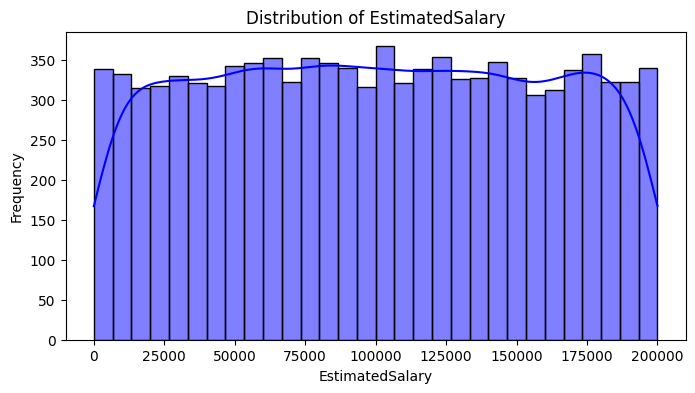

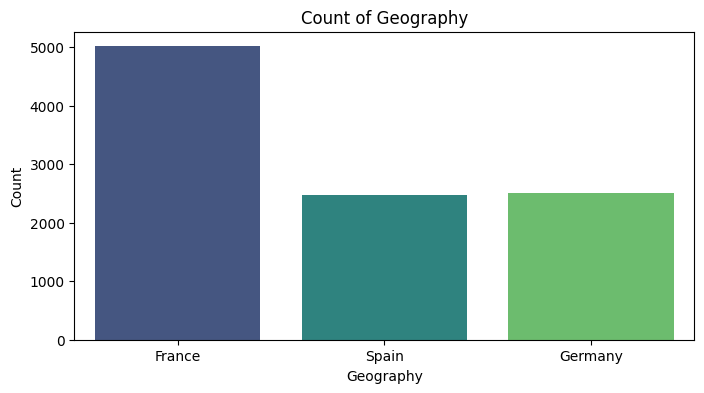

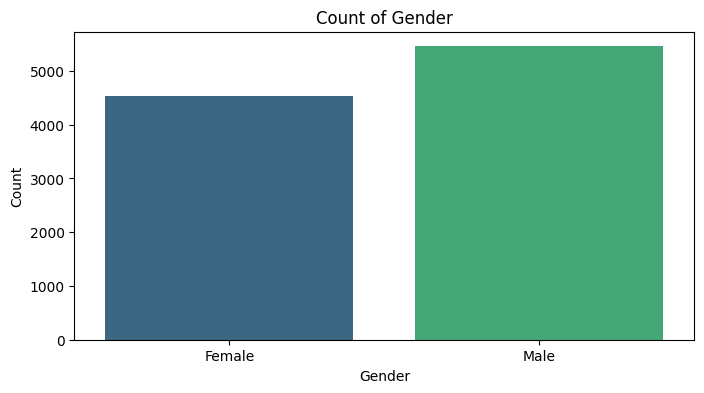

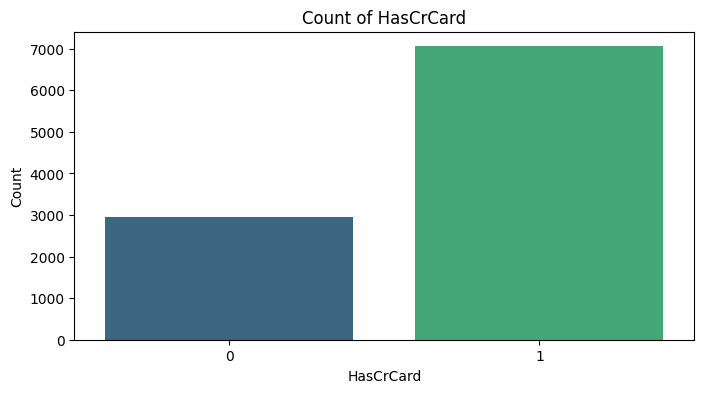

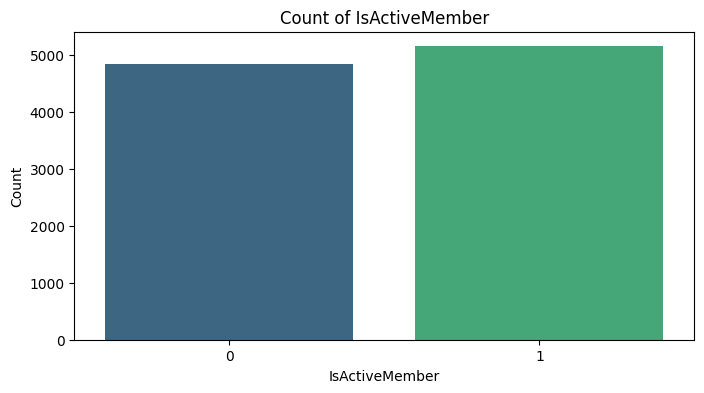

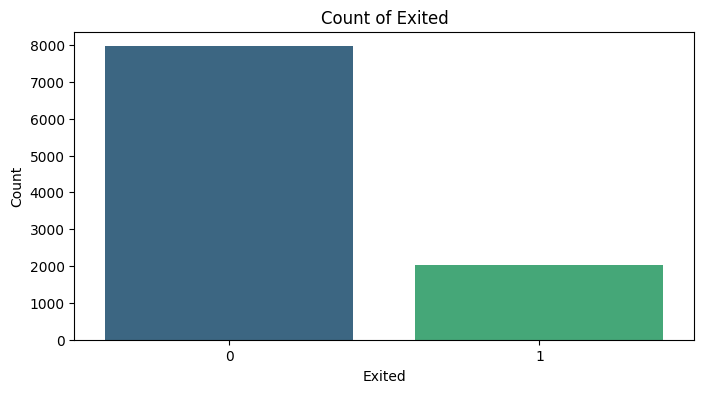

In [8]:
# Univariate analysis for numerical variables
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(ds[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical variables
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=ds, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Bivariate Analysis

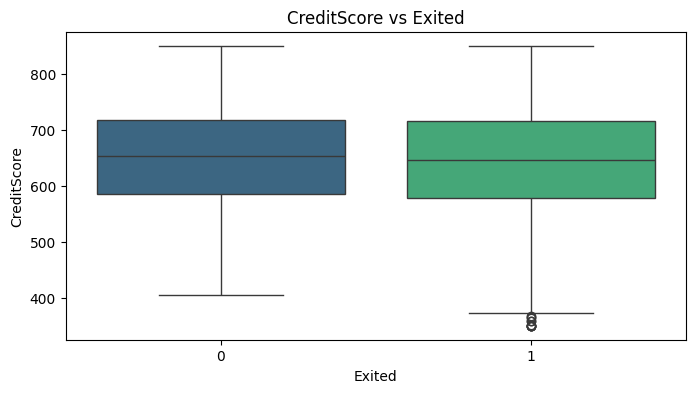

Statistical Summary for CreditScore by Exited:
         count    mean     std    min    25%    50%    75%    max
Exited                                                           
0       7963.0  651.85   95.65  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.35  100.32  350.0  578.0  646.0  716.0  850.0




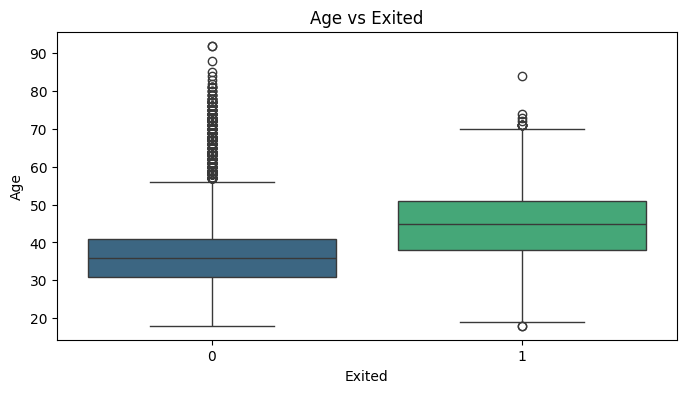

Statistical Summary for Age by Exited:
         count   mean    std   min   25%   50%   75%   max
Exited                                                    
0       7963.0  37.41  10.13  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.84   9.76  18.0  38.0  45.0  51.0  84.0




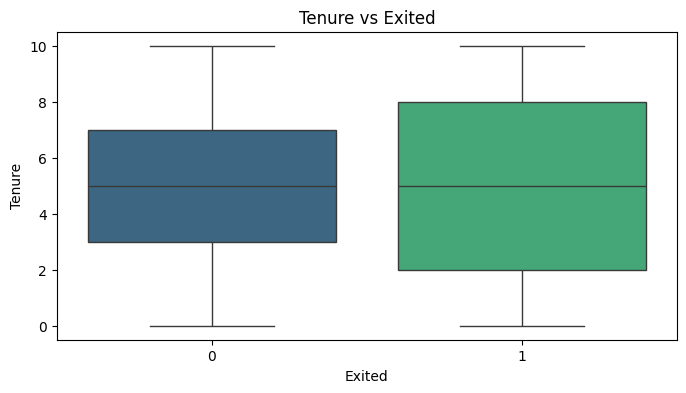

Statistical Summary for Tenure by Exited:
         count  mean   std  min  25%  50%  75%   max
Exited                                              
0       7963.0  5.03  2.88  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.93  2.94  0.0  2.0  5.0  8.0  10.0




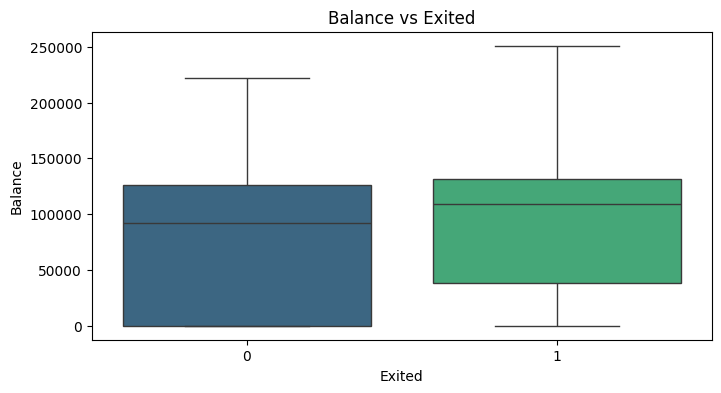

Statistical Summary for Balance by Exited:
         count      mean       std  min       25%        50%        75%  \
Exited                                                                    
0       7963.0  72745.30  62848.04  0.0      0.00   92072.68  126410.28   
1       2037.0  91108.54  58360.79  0.0  38340.02  109349.29  131433.33   

              max  
Exited             
0       221532.80  
1       250898.09  




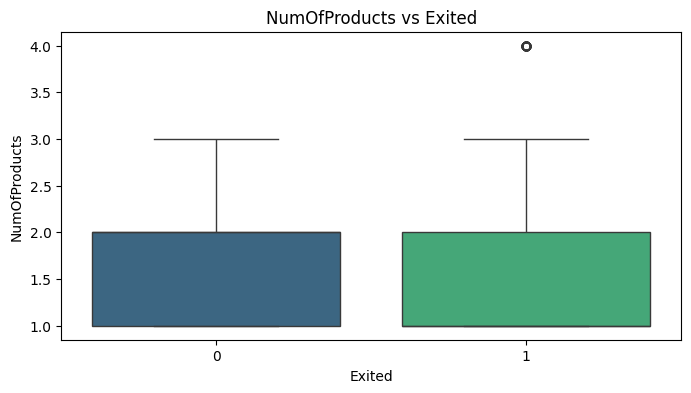

Statistical Summary for NumOfProducts by Exited:
         count  mean   std  min  25%  50%  75%  max
Exited                                             
0       7963.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0
1       2037.0  1.48  0.80  1.0  1.0  1.0  2.0  4.0




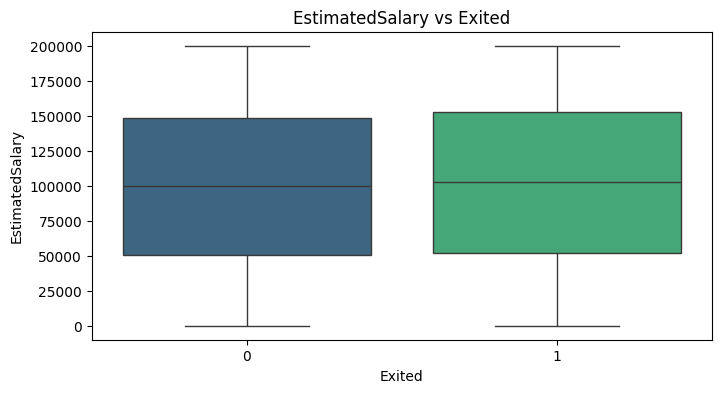

Statistical Summary for EstimatedSalary by Exited:
         count       mean       std    min       25%        50%        75%  \
Exited                                                                       
0       7963.0   99738.39  57405.59  90.07  50783.49   99645.04  148609.96   
1       2037.0  101465.68  57912.42  11.58  51907.72  102460.84  152422.91   

              max  
Exited             
0       199992.48  
1       199808.10  




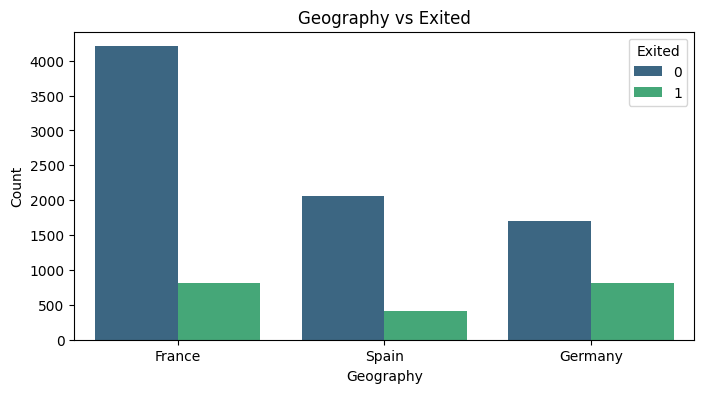

Contingency Table for Geography vs Exited:
Exited        0     1
Geography            
France     0.84  0.16
Germany    0.68  0.32
Spain      0.83  0.17




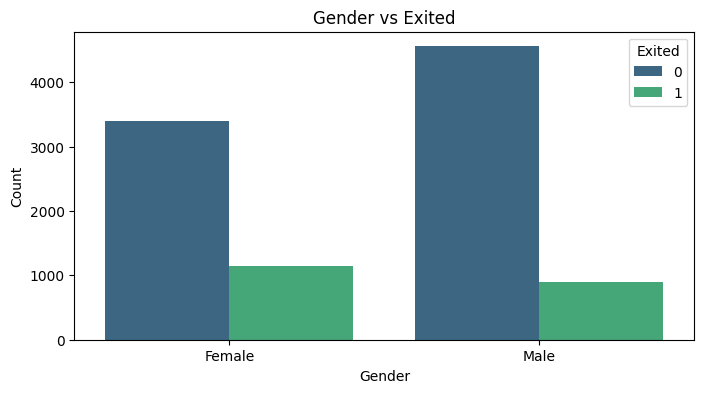

Contingency Table for Gender vs Exited:
Exited     0     1
Gender            
Female  0.75  0.25
Male    0.84  0.16




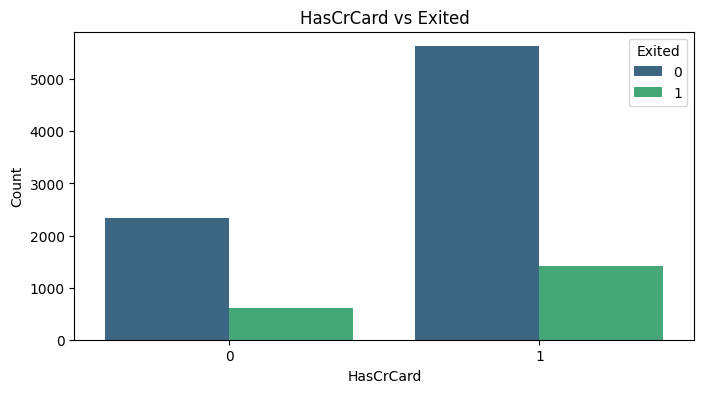

Contingency Table for HasCrCard vs Exited:
Exited        0     1
HasCrCard            
0          0.79  0.21
1          0.80  0.20




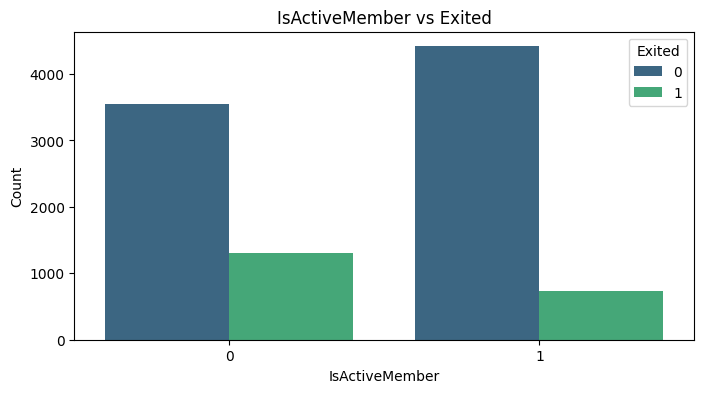

Contingency Table for IsActiveMember vs Exited:
Exited             0     1
IsActiveMember            
0               0.73  0.27
1               0.86  0.14




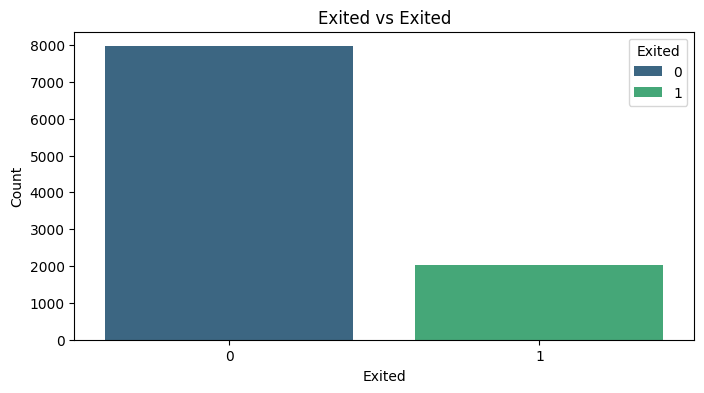

Contingency Table for Exited vs Exited:
Exited    0    1
Exited          
0       1.0  0.0
1       0.0  1.0




In [9]:
# Bivariate analysis for numerical variables vs 'Exited'
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=ds, x='Exited', y=col, palette='viridis')
    plt.title(f'{col} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)
    plt.show()
    
    # Display statistical summary
    print(f"Statistical Summary for {col} by Exited:")
    print(ds.groupby('Exited')[col].describe().round(2))
    print("\n")

# Bivariate analysis for categorical variables vs 'Exited'
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=ds, x=col, hue='Exited', palette='viridis')
    plt.title(f'{col} vs Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Exited', loc='upper right')
    plt.show()
    
    # Display contingency table
    print(f"Contingency Table for {col} vs Exited:")
    print(pd.crosstab(ds[col], ds['Exited'], normalize='index').round(2))
    print("\n")

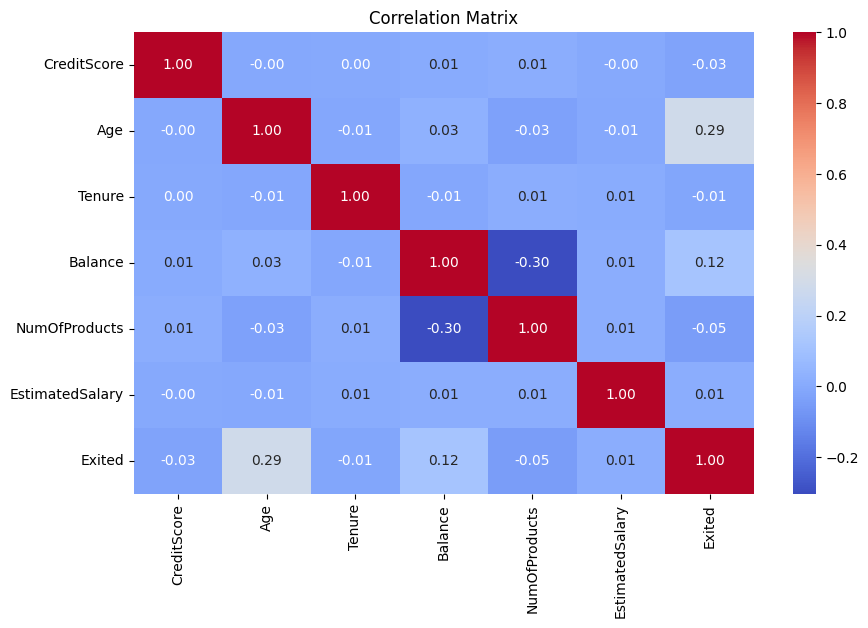

In [10]:
# Compute the correlation matrix
correlation_matrix = ds[numerical_columns + ['Exited']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


### Summary of Exploratory Data Analysis (EDA)

#### Key Insights:
- Age, balance, and geography are significant factors influencing customer exit.
- The dataset is imbalanced, with only 20% of customers exiting, which may affect model performance.
- Further preprocessing, such as dummy variable creation and normalization, is required before model building.


## Data Preprocessing

In [11]:
import os
import numpy as np
import tensorflow as tf
import random

# Set seeds
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Dummy Variable Creation

In [12]:
# Creating dummy variables for categorical columns
ds = pd.get_dummies(ds, columns=['Geography', 'Gender'], drop_first=True)

# Display the first few rows of the updated dataset
print("Dataset after dummy variable creation:")
display(ds.head())

Dataset after dummy variable creation:


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Train-validation-test Split

In [13]:
# Define the target variable and features
# Drop 'CustomerId' and 'Surname' as they are not useful for prediction
X = ds.drop(columns=['Exited', 'CustomerId'])
y = ds['Exited']

# Split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Print the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (6000, 11), (6000,)
Validation set shape: (2000, 11), (2000,)
Test set shape: (2000, 11), (2000,)


### Data Normalization

In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Columns to normalize
columns_to_normalize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Fit and transform the training data
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Transform the validation and test data using the same scaler
X_val[columns_to_normalize] = scaler.transform(X_val[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Display the first few rows of the normalized training data
print("Normalized training data:")
display(X_train.head())

Normalized training data:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1995,-0.694374,0.480890,-0.009572,0.295612,0.797297,1,1,0.124178,False,False,False
2724,-2.049957,-0.091560,1.022171,0.696248,-0.913029,1,0,0.528050,True,False,False
5224,1.571829,0.385481,-0.697401,-1.240550,-0.913029,1,0,-0.478379,False,True,True
7697,-0.518459,0.194665,-0.697401,-1.240550,0.797297,1,0,-0.787547,False,True,False
1226,-1.242816,0.290073,0.334342,0.177637,0.797297,1,0,-0.422558,True,False,False


## Model Building

### Model Evaluation Criterion

### Choosing the Best Metric for the Business Scenario

In this business scenario, the primary objective is to accurately identify customers who are likely to churn (leave the bank). The focus is on minimizing false negatives (failing to identify actual churners), as retaining these customers is critical to reducing revenue loss. Below is the rationale for selecting recall as the evaluation metric:

1. **Imbalanced Dataset**:
    - The dataset is imbalanced, with only ~20% of customers exiting. Accuracy may not be a reliable metric as it can be misleading in such cases.

2. **Business Impact of False Negatives**:
    - False negatives (predicting a customer will stay when they actually leave) are highly costly for the business. Missing potential churners could lead to significant revenue loss and reduced customer retention.

3. **Business Impact of False Positives**:
    - False positives (predicting a customer will leave when they actually stay) may lead to unnecessary retention efforts, but the cost is relatively lower compared to false negatives.

4. **Recommended Metric**:
    - **Recall (Sensitivity)**: Measures the ability to correctly identify churners. High recall ensures fewer false negatives, which aligns with the business objective of minimizing missed churners.

5. **Final Metric Selection**:
    - ***Recall***     is chosen as the primary metric to minimize false negatives and accurately identify churners, aligning with the bank's objective of retaining customers and reducing revenue loss.


### Neural Network with SGD Optimizer

In [15]:

from keras.models import Sequential
from keras.layers import LeakyReLU, BatchNormalization, Dense
from keras.callbacks import EarlyStopping

# Define the neural network model
model_sgd = Sequential()

model_sgd.add(Dense(64))  # Existing hidden layer with 64 units
model_sgd.add(BatchNormalization())  # Batch normalization
model_sgd.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation

model_sgd.add(Dense(32))  # Existing hidden layer with 32 units
model_sgd.add(BatchNormalization())  # Batch normalization
model_sgd.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation

model_sgd.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with SGD optimizer and recall as the metric
model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['recall'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_recall', patience=2, restore_best_weights=True)

# Train the model
history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_recall = model_sgd.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Recall: {test_recall:.4f}")

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.5908 - recall: 0.2519 - val_loss: 0.4799 - val_recall: 0.1057
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.4438 - recall: 0.1460 - val_loss: 0.4242 - val_recall: 0.1941
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.4163 - recall: 0.2294 - val_loss: 0.4057 - val_recall: 0.2211
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.4008 - recall: 0.2705 - val_loss: 0.3945 - val_recall: 0.2629
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.3893 - recall: 0.3037 - val_loss: 0.3859 - val_recall: 0.2973
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.3797 - recall: 0.3329 - val_loss: 0.3790 - val_recall: 0.3317
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3717 - recall: 0.3565 - val_loss: 0.3736 - val_recall: 0.3612
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.3650 - recall: 0.3858 - val_loss: 0.3690 - val_recall:

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [16]:
# Define the neural network model with Adam optimizer
model_adam = Sequential()

model_adam.add(Dense(64))  # Existing hidden layer with 64 units
model_adam.add(BatchNormalization())  # Batch normalization
model_adam.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation

model_adam.add(Dense(32))  # Existing hidden layer with 32 units
model_adam.add(BatchNormalization())  # Batch normalization
model_adam.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation

model_adam.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with Adam optimizer and recall as the metric
model_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_recall', patience=2, restore_best_weights=True)

# Train the model
history_adam = model_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
test_loss_adam, test_recall_adam = model_adam.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_adam:.4f}, Test Recall: {test_recall_adam:.4f}")

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.7777 - recall: 0.7984 - val_loss: 0.4120 - val_recall: 0.2408
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3829 - recall: 0.3913 - val_loss: 0.3721 - val_recall: 0.3784
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.3562 - recall: 0.4271 - val_loss: 0.3636 - val_recall: 0.3907
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.3456 - recall: 0.4602 - val_loss: 0.3612 - val_recall: 0.3857
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.3388 - recall: 0.4824 - val_loss: 0.3611 - val_recall: 0.3784
Test Loss: 0.3470, Test Recall: 0.4275


### Neural Network with Adam Optimizer and Dropout

In [17]:
from keras.layers import Dropout

# Define the neural network model with Adam optimizer and Dropout
model_adam_dropout = Sequential()

model_adam_dropout.add(Dense(64))  # Existing hidden layer with 64 units
model_adam_dropout.add(BatchNormalization())  # Batch normalization
model_adam_dropout.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model_adam_dropout.add(Dropout(0.3))  # Dropout layer

model_adam_dropout.add(Dense(32))  # Existing hidden layer with 32 units
model_adam_dropout.add(BatchNormalization())  # Batch normalization
model_adam_dropout.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model_adam_dropout.add(Dropout(0.3))  # Dropout layer

model_adam_dropout.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with Adam optimizer and recall as the metric
model_adam_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_recall', patience=2, restore_best_weights=True)

# Train the model
history_adam_dropout = model_adam_dropout.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
test_loss_adam_dropout, test_recall_adam_dropout = model_adam_dropout.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_adam_dropout:.4f}, Test Recall: {test_recall_adam_dropout:.4f}")

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 0.6309 - recall: 0.4262 - val_loss: 0.4290 - val_recall: 0.2211
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.4444 - recall: 0.2675 - val_loss: 0.3921 - val_recall: 0.3243
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.4284 - recall: 0.3041 - val_loss: 0.3805 - val_recall: 0.3636
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.4011 - recall: 0.3436 - val_loss: 0.3689 - val_recall: 0.3907
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.3940 - recall: 0.3443 - val_loss: 0.3652 - val_recall: 0.4103
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.3923 - recall: 0.3665 - val_loss: 0.3635 - val_recall: 0.4005
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3850 - recall: 0.3822 - val_loss: 0.3610 - val_recall: 0.4152
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.3763 - recall: 0.3791 - val_loss: 0.3601 - val_recall:

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [18]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the neural network model
model_sgd_smote = Sequential()

model_sgd_smote.add(Dense(64))  # Existing hidden layer with 64 units
model_sgd_smote.add(BatchNormalization())  # Batch normalization
model_sgd_smote.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation

model_sgd_smote.add(Dense(32))  # Existing hidden layer with 32 units
model_sgd_smote.add(BatchNormalization())  # Batch normalization
model_sgd_smote.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation

model_sgd_smote.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with SGD optimizer and recall as the metric
model_sgd_smote.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['recall'])

# Add early stopping
early_stop_smote = EarlyStopping(monitor='val_recall', patience=2, restore_best_weights=True)

# Train the model
history_sgd_smote = model_sgd_smote.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_smote],
    verbose=1
)

# Evaluate the model on the test set
test_loss_sgd_smote, test_recall_sgd_smote = model_sgd_smote.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_sgd_smote:.4f}, Test Recall: {test_recall_sgd_smote:.4f}")

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.6321 - recall: 0.7304 - val_loss: 0.5417 - val_recall: 0.6929
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.5131 - recall: 0.7481 - val_loss: 0.5105 - val_recall: 0.7052
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.4852 - recall: 0.7676 - val_loss: 0.4973 - val_recall: 0.7199
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.4710 - recall: 0.7787 - val_loss: 0.4859 - val_recall: 0.7297
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.4616 - recall: 0.7812 - val_loss: 0.4780 - val_recall: 0.7248
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.4543 - recall: 0.7845 - val_loss: 0.4731 - val_recall: 0.7248
Test Loss: 0.4794, Test Recall: 0.7396


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [19]:
# Define the neural network model with Adam optimizer
model_adam_smote = Sequential()
model_adam_smote.add(Dense(64, input_dim=X_train_balanced.shape[1]))
model_adam_smote.add(BatchNormalization())  # Batch normalization
model_adam_smote.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model_adam_smote.add(Dense(32))
model_adam_smote.add(BatchNormalization())  # Batch normalization
model_adam_smote.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model_adam_smote.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with Adam optimizer and recall as the metric
model_adam_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

# Add early stopping
early_stop_smote_adam = EarlyStopping(monitor='val_recall', patience=2, restore_best_weights=True)

# Train the model
history_adam_smote = model_adam_smote.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_smote_adam],
    verbose=1
)

# Evaluate the model on the test set
test_loss_adam_smote, test_recall_adam_smote = model_adam_smote.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_adam_smote:.4f}, Test Recall: {test_recall_adam_smote:.4f}")

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 0.5537 - recall: 0.6960 - val_loss: 0.5119 - val_recall: 0.7641
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.4600 - recall: 0.7924 - val_loss: 0.4628 - val_recall: 0.7273
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.4398 - recall: 0.8043 - val_loss: 0.4520 - val_recall: 0.7297
Test Loss: 0.5162, Test Recall: 0.7740


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [20]:
# Define the neural network model with Adam optimizer and Dropout
model_adam_smote_dropout = Sequential()
model_adam_smote_dropout.add(Dense(64, input_dim=X_train_balanced.shape[1]))
model_adam_smote_dropout.add(BatchNormalization())  # Batch normalization
model_adam_smote_dropout.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model_adam_smote_dropout.add(Dropout(0.3))  # Dropout layer

model_adam_smote_dropout.add(Dense(32))
model_adam_smote_dropout.add(BatchNormalization())  # Batch normalization
model_adam_smote_dropout.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model_adam_smote_dropout.add(Dropout(0.2))  # Dropout layer

model_adam_smote_dropout.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with Adam optimizer and recall as the metric
model_adam_smote_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

# Add early stopping
early_stop_smote_adam_dropout = EarlyStopping(monitor='val_recall', patience=2, restore_best_weights=True)

# Train the model
history_adam_smote_dropout = model_adam_smote_dropout.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_smote_adam_dropout],
    verbose=1
)

# Evaluate the model on the test set
test_loss_adam_smote_dropout, test_recall_adam_smote_dropout = model_adam_smote_dropout.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_adam_smote_dropout:.4f}, Test Recall: {test_recall_adam_smote_dropout:.4f}")

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 0.6603 - recall: 0.7068 - val_loss: 0.5193 - val_recall: 0.7297
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.5326 - recall: 0.7484 - val_loss: 0.4886 - val_recall: 0.7346
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.5091 - recall: 0.7660 - val_loss: 0.4839 - val_recall: 0.7371
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.4969 - recall: 0.7785 - val_loss: 0.4635 - val_recall: 0.7174
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.4857 - recall: 0.7768 - val_loss: 0.4550 - val_recall: 0.7150
Test Loss: 0.4823, Test Recall: 0.7617


## Model Performance Comparison and Final Model Selection

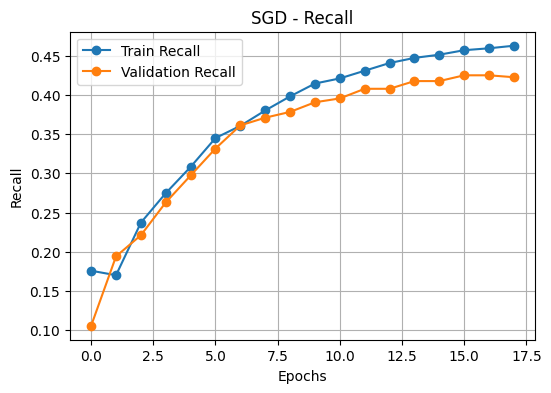

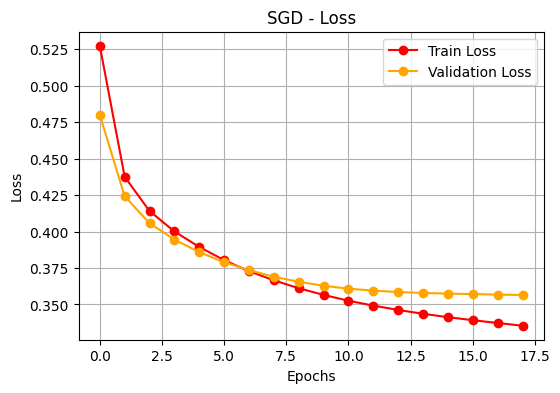

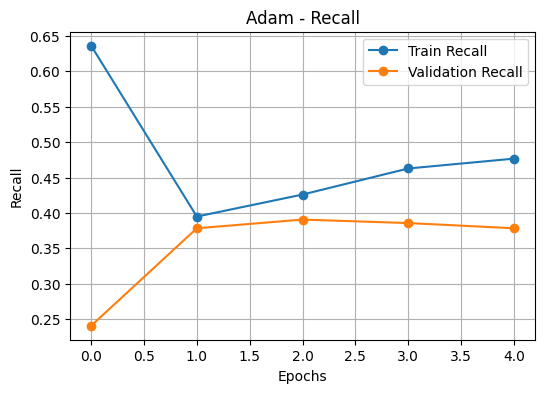

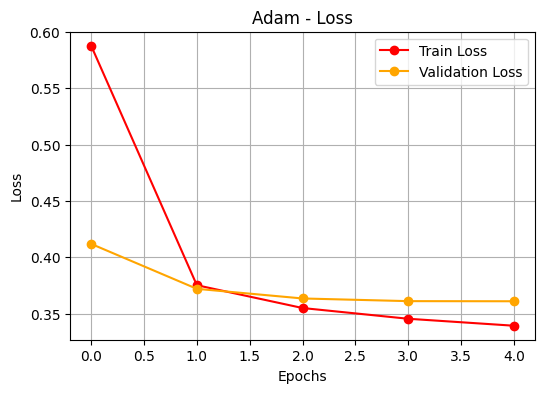

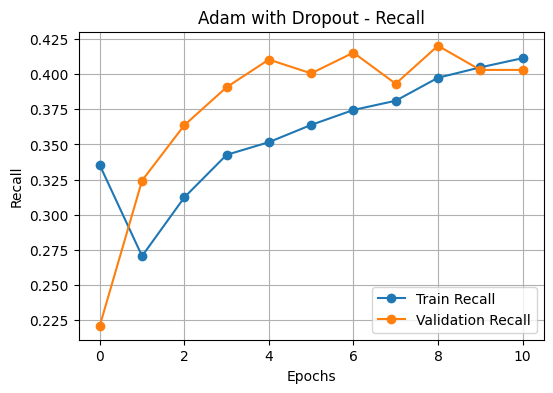

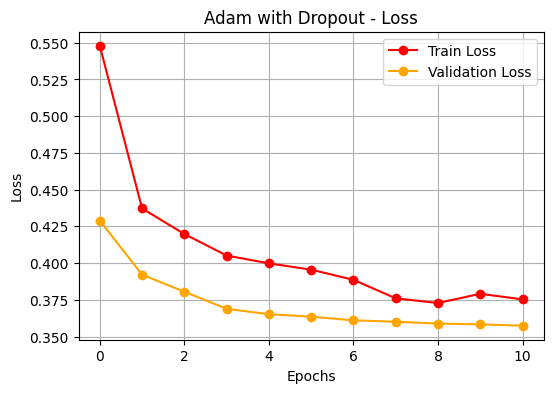

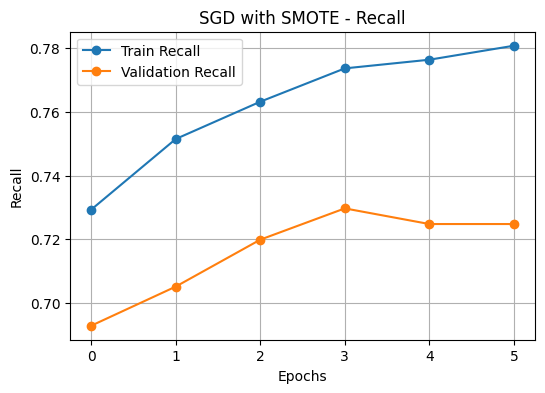

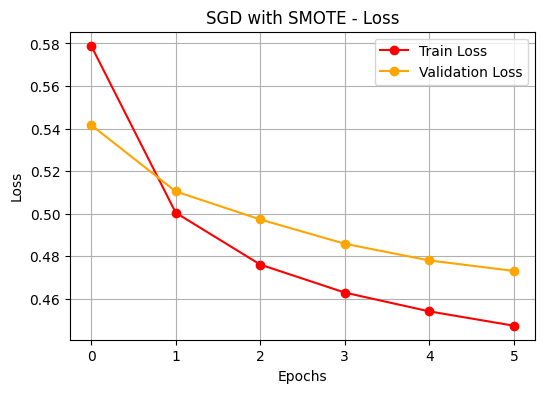

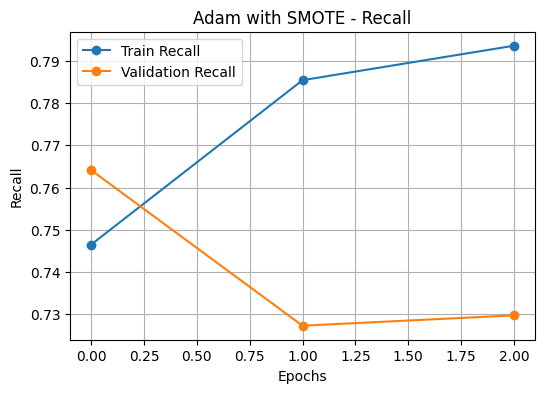

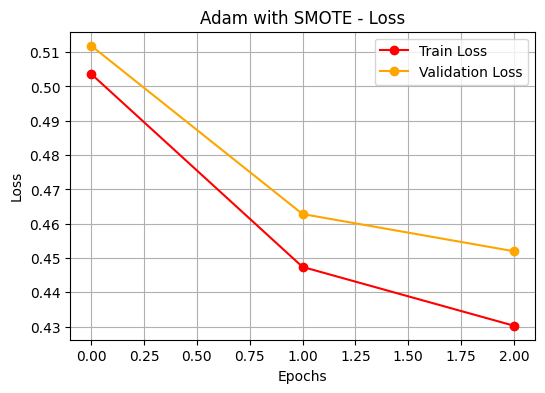

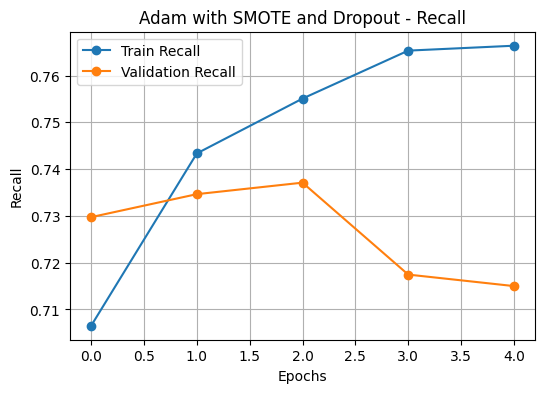

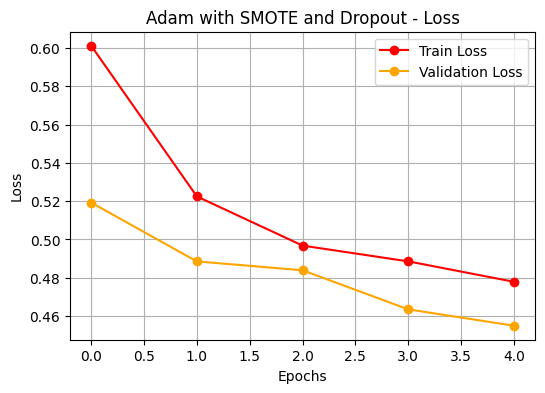

In [21]:
# Define a function to plot recall and loss for a given history object
def plot_metrics(history, model_name):
    train_recall = history.history['recall']
    val_recall = history.history['val_recall']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot recall
    plt.figure(figsize=(6, 4))
    plt.plot(train_recall, label='Train Recall', marker='o')
    plt.plot(val_recall, label='Validation Recall', marker='o')
    plt.title(f'{model_name} - Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot loss
    plt.figure(figsize=(6, 4))
    plt.plot(train_loss, label='Train Loss', marker='o', color='red')
    plt.plot(val_loss, label='Validation Loss', marker='o', color='orange')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot metrics for all models
plot_metrics(history_sgd, "SGD")
plot_metrics(history_adam, "Adam")
plot_metrics(history_adam_dropout, "Adam with Dropout")
plot_metrics(history_sgd_smote, "SGD with SMOTE")
plot_metrics(history_adam_smote, "Adam with SMOTE")
plot_metrics(history_adam_smote_dropout, "Adam with SMOTE and Dropout")

In [22]:
# Create a dictionary to store model performance
model_performance = {
	"Model": [
		"SGD",
		"Adam",
		"Adam with Dropout",
		"SGD with SMOTE",
		"Adam with SMOTE",
		"Adam with SMOTE and Dropout"
	],
	"Test Loss": [
		test_loss,
		test_loss_adam,
		test_loss_adam_dropout,
		test_loss_sgd_smote,
		test_loss_adam_smote,
		test_loss_adam_smote_dropout
	],
	"Test Recall": [
		test_recall,
		test_recall_adam,
		test_recall_adam_dropout,
		test_recall_sgd_smote,
		test_recall_adam_smote,
		test_recall_adam_smote_dropout
	]
}

# Convert the dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Sort the DataFrame by Test Recall in descending order
performance_df = performance_df.sort_values(by="Test Recall", ascending=False)

# Display the performance comparison
print("Model Performance Comparison:")
display(performance_df)

Model Performance Comparison:


,Model,Test Loss,Test Recall
4,Adam with SMOTE,0.516235,0.773956
5,Adam with SMOTE and Dropout,0.482277,0.761671
3,SGD with SMOTE,0.479365,0.739558
2,Adam with Dropout,0.345067,0.449631
0,SGD,0.342924,0.439803
1,Adam,0.347009,0.427518


### Model Comparison Graphs with Quantitative Metrics

### Model Comparison Graphs with Quantitative Metrics

- **SGD**:
    - **Recall**: 0.440
    - **Loss**: 0.343
    - The recall improves steadily during training but plateaus early, indicating limited learning capacity. Loss decreases initially but stabilizes quickly, showing minimal further improvement.

- **Adam**:
    - **Recall**: 0.428
    - **Loss**: 0.347
    - Recall increases gradually but shows signs of overfitting as validation recall diverges from training recall. Loss reduces consistently but validation loss stabilizes earlier than training loss.

- **Adam with Dropout**:
    - **Recall**: 0.450
    - **Loss**: 0.345
    - Recall improves with reduced overfitting due to dropout, but overall performance is slightly lower. Loss decreases steadily, with dropout helping to maintain generalization.

- **SGD with SMOTE**:
    - **Recall**: 0.740
    - **Loss**: 0.479
    - Recall improves significantly due to balanced data, with validation recall closely following training recall. Loss decreases consistently, showing effective learning on balanced data.

- **Adam with SMOTE**:
    - **Recall**: 0.774
    - **Loss**: 0.516
    - Recall achieves high values, benefiting from both SMOTE and Adam optimizer's efficiency. Loss decreases steadily, but validation loss stabilizes earlier, indicating convergence.

- **Adam with SMOTE and Dropout**:
    - **Recall**: 0.762
    - **Loss**: 0.482
    - Recall remains high with reduced overfitting, balancing performance and generalization. Loss decreases effectively, with dropout helping to prevent overfitting on balanced data.

| Model                     | Recall | Loss  | Notes                                                                 |
|---------------------------|--------|-------|-----------------------------------------------------------------------|
| SGD                       | 0.440  | 0.343 | Weak recall despite good loss — underfitting                         |
| Adam                      | 0.428  | 0.347 | Moderate recall — likely overfitting, despite lower loss             |
| Adam + Dropout            | 0.450  | 0.345 | More stable, but performance lower overall                           |
| SGD + SMOTE               | 0.740  | 0.479 | Big recall gain with SMOTE, solid generalization                     |
| Adam + SMOTE              | 0.774  | 0.516 | High recall, but higher loss — potentially overfitting on SMOTE data |
| Adam + SMOTE + Dropout    | 0.762  | 0.482 | Best recall, better generalization, but slightly higher loss         |

### WINNER

Primary Choice: **Adam with SMOTE**
	•	Highest Recall (0.774) — most effective at catching churners
	•	We will use this because cost of missing a churner is high (e.g. valuable clients, regulatory risk)


### Actionable Insights and Recommendations:

1. **Age and Churn**:
    - Older customers are more likely to churn. Implement targeted retention strategies for this demographic.

2. **Balance and Churn**:
    - Customers with higher account balances are more likely to churn. Focus on personalized engagement for high-value customers.

3. **Geography and Churn**:
    - Customers from certain regions (e.g., Germany) exhibit higher churn rates. Develop region-specific strategies to address localized issues.

4. **Activity Level and Churn**:
    - Inactive members are more likely to churn. Introduce loyalty programs or personalized offers to encourage engagement.

5. **Cross-Selling Opportunities**:
    - Customers with fewer products are more likely to churn. Train staff to promote relevant products and enhance customer relationships.


*



<font size=6 color='blue'>Power Ahead</font>
___